# A (very) Brief Introduction to Model Selection the Bayesian way

In some scenarios there can be more than one model that reproduces the data (within limits set by the uncertainty in the measurements). Bayes' theorem provides an objective way to determine whether one of these should be prefered over the other.

## Models
The following section borrows heavily from Sivia et al.'s paper `An introduction to Bayesian model selection` {cite}`siviaIntroductionBayesianModel1993b` which contains  examples from a range of science/engineering applications including X-ray diffraction and nmr. Another very useful reference is David MacKay's `Bayesian Interpolation` {cite}`mackayBayesianInterpolation1992`.

```{admonition} Consider the following question:
In the R&D department of Acme Ltd two of the leading researchers, Mr A and Mrs B, have competing theories (models) for the increased failure rate of the latest [Acme Rocket Powered Roller Skates](https://www.youtube.com/watch?v=Hsv4IYKtC3o). Mrs B's theorem has an adjustable parameter $\lambda$ in contrast Mr A's model has no parameters. Who's theory should be preferred given the available data $D$?
```

To tackle this problem we need to calculate the following ratio:

$$ R = \frac{\textrm{Probability that Mrs B is correct}}{\textrm{Probability that Mr A is correct}} $$

If this ratio is very large then we prefer Mrs B's theory, if it is very much less than one then Mr A's theory is preferred. For values between 1 and 100 then the isn't strong evidence either way and more data (or better models) will be required.

Using Bayes' theorem we can write our ratio as:

```{math}
:label: probRatios
\frac{\textrm{prob}(B|D)}{\textrm{prob}(A|D)} = \frac{\textrm{prob}(B)}{\textrm{prob}(A)}\times\frac{\textrm{prob}(D|B)}{\textrm{prob}(D|A)} 
```

The first term on the right handside of equation {eq}`probRatios` (the `prior odds ratio`) is the ratio of the prior probabilities of the theories. In the absence of other information we could take this as one, or it could be based on the researchers track records...

The second term is known as the `Bayes Factor` and it tell us about how the prior odds ratio is updated in the light of the data (evidence).

The second term on the right hand side of Equation {eq}`probRatios` has a hidden complication. Remember that Mrs B's theory has a parameter $\lambda$ - this does not appear in Equation {eq}`probRatios` so we need to use equation {eq}`margn` to integrate (marginalise) this nuisance parameter away.

```{math}
:label: probD
 \textrm{prob}(B|D) &= \int \textrm{prob}(D,\lambda|B)d\lambda\\
&=  \int \textrm{prob}(D|\lambda,B)\textrm{prob}(\lambda|B)d\lambda
``` 
The first term in the integral is a likelihood function as we saw in the coin flipping problem. The second term is Mrs B's prior for the parameter $\lambda$. For this example we will assume that there is an optimum value, $\lambda_0$ that lies in the range $\lambda_{low}\rightarrow\lambda_{high}$, and that there is a uniform probability in that range with zero probability outside of it. The height of the prior will be given by:

```{math}
:label: MrsBPrior
\textrm{prob}(\lambda|B)=\frac{1}{\lambda_{high}-\lambda_{low}}
```

Notice that equation {eq}`MrsBPrior` is normalised and that there must be finite limits for the parameters or the probability will go to zero.

For simplicity we will assume that there is one value of the parameter that corresponds to the optimum value ($\lambda_0$) and that in the region ($\lambda\pm\delta$) of this optimum value the probability of this data is given by a gaussian:

```{math}
:label: Pdata
\textrm{prob}(D|\lambda,B) = \textrm{prob}(D|\lambda_0,B)\times\exp\left[-\frac{(\lambda-\lambda_0)^2}{2\delta\lambda^2}\right]
```

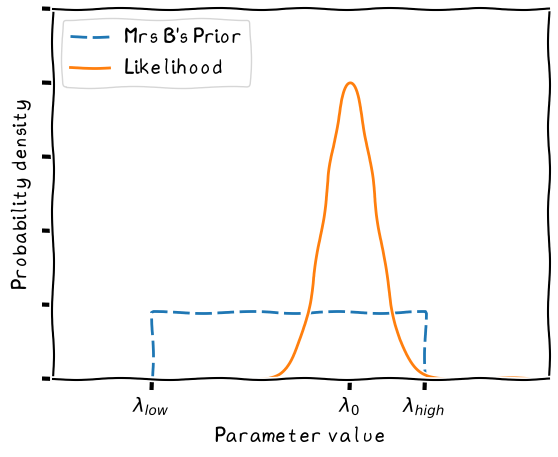

In [1]:
# Plot of uniform prior for Mrs B's model
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker

import numpy as np
from scipy.stats import norm

# set parameters
l1 = 200
l2 = 750
l0 = 600
width = 50
prior = 1./(l2-l1)

# range
xstart = 0
xend = 1000

# plot
# create figure
with plt.xkcd():
    fig = plt.figure()
    ax = fig.subplots()

    x_axis = np.arange(xstart, xend, 0.01)
    # draw prior
    ax.plot([l1, l1, l2, l2], [0, prior, prior, 0], dashes=[6, 2], label="Mrs B's Prior")
    ax.plot(x_axis, norm.pdf(x_axis, l0, width), label='Likelihood')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 0.01)
    ax.set_xlabel('Parameter value')
    ax.set_ylabel(r'Probability density')
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #label key points
    xticks = [l1,l0,l2]
    ax.set_xticks(xticks)
    x_labels = [r"$\lambda_{low}$", r"$\lambda_0$", r"$\lambda_{high}$"]
    ax.set_xticklabels(x_labels)
    ax.legend()

The prior does not have a functional dependance on $\lambda$ which allows us to rewrite equation {eq}`probD` as

```{math}
:label: probD2
 \textrm{prob}(B|D) = \frac{1}{\lambda_{high}-\lambda_{low}}\int_{\lambda_{low}}^{\lambda_{high}} \textrm{prob}(D|\lambda,B)d\lambda
```

As long as the limits o the prior do not cause significant truncation (cut-off) to the gaussian likelihood then it can be shown that the integral will have the form: $\delta\lambda\sqrt{2\pi}\times\textrm{prob}(D|\lambda_0,B)$. Which gives us:

```{math}
:label: probD3
 \textrm{prob}(B|D) = \frac{\delta\lambda\sqrt{2\pi}\times\textrm{prob}(D|\lambda_0,B)}{\lambda_{high}-\lambda_{low}}
```

We can use equation {eq}`probD3` to write equation {eq}`probRatios` as the product of three terms:

```{math}
:label: probRatios2 
\frac{\textrm{prob}(B|D)}{\textrm{prob}(A|D)} = \frac{\textrm{prob}(B)}{\textrm{prob}(A)}\times\frac{\textrm{prob}(D|\lambda_0,B)}{\textrm{prob}(D|A)}\times\frac{\delta\lambda\sqrt{2\pi}}{\lambda_{high}-\lambda_{low}}
```
The first term on the RHS of {eq}`probRatios2` is the ratio of our prior preferences for the models. In many cases we can take this as unity. The second term is a measure of how well the models fit the data relative to each other. This will always favour Mrs B's model-for a wide enough range of $\lambda$ there will always be some value that beats the parameter free model. The third term moderates this effect - it scales the ratio by the allowed range of the parameter - if this range is significantly greater than the uncertainty $\delta\lambda$ then Mr A's model wins. 

### Occam's razor factor

The third term in {eq}`probRatios2` is sometimes referred to as the `Occam's Razor Factor`{cite}`Sivia2006`. This is because it favours simpler models over complicated ones when all other things are equal.

## Applications
Choosing between a parameter free model and a single parameter model is unlikely to come up often in engineering and science applications. Comparing models with a range of paremeters is a much more likely scenario. Fortunately, it is possible to make use of most of the algebraic shenanigans above.

Let's looks the case where both models have a single parameter ($\mu$ for Mr A's model). Providing that the assumptions about the models/parameters invoked above hold for Mr A's model then it can be shown that equation {eq}`probRatios2` is modified to:

```{math}
:label: probRatios3 
\frac{\textrm{prob}(B|D)}{\textrm{prob}(A|D)} = \frac{\textrm{prob}(B)}{\textrm{prob}(A)}\times\frac{\textrm{prob}(D|\lambda_0,B)}{\textrm{prob}(D|\mu_0,A)}\times\frac{\mu_{high}-\mu_{low}}{\lambda_{high}-\lambda_{low}}
```
An example of an application of this analysis is differentiating between the use of a gaussian lineshape and a lorentzian one for a spectral peak where there is some free parameter (e.g. the amplitude) that requires optimising.


### Reducing overfitting
AIC (and BIC) are essentially heuristics with no substantial foundation. The Bayesian method described above is significantly more principled...

The paper by Sivia et al. {cite}`siviaIntroductionBayesianModel1993b` goes into some quantative examples of applying the model selection process outlined above to real data. Rather than calulate the ratios of {eq}`probRatios3` they take the equivalent step of plotting the maximum values of the posterior probability densities which has the added advantage of allowing the reader to judge whether the best value is significantly different from those around it.

Stephen Gull shows an instructive example based on this methodology {cite}`gullBayesianInductiveInference1988`. In this example a dataset formed from a sum of polynomials is analysed to work out the highest order polynomial used to make the data. The results of this are shown in {numref}`NParams_fig`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#read data from csv file, add column titles
df = pd.read_csv('GullPolynomial.csv', header=None, names=['NParam','logProb'])
# line plot of the data, xticks set to ensure integer values
_ = df.plot.line(x='NParam',y='logProb', marker="o", xlabel='Number of Parameters', ylabel='Log(prob(Model))',xticks=[2,4,6,8,10,12,14,16,18,20]).get_figure().savefig('Nparams.png');

```{figure} Nparams.png
---
name: NParams_fig
---
Posterior Probability distribution for fits to a polynomial fit - adapted from {cite}`gullBayesianInductiveInference1988`. There is a maximum at polynomial of order 10. Note that the y-axis is logarithmic. 
```

```{admonition} Exercise–come back to this when you have got the hang of pyMC
:class: dropdown
Apply the method of Gull {cite}`gullBayesianInductiveInference1988,siviaIntroductionBayesianModel1993b` to some polynomial data and deduce the order of polynomial that best fits your data.
```

## Bibliography 

```{bibliography}
:filter: docname in docnames
```